In [ ]:
import tensorflow as tf # type: ignore
from PIL import Image, ImageOps # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.3)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [2]:
def visualize_cnn_layers(model, image_array):
    # Extract outputs from each Conv2D/MaxPooling2D layer
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(image_array)

    for i, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        size = activation.shape[1]

        # Display first 6 feature maps
        n_features = min(num_filters, 6)
        fig, axes = plt.subplots(1, n_features, figsize=(15, 5))
        fig.suptitle(f"Layer {i+1}: {model.layers[i].name}")

        for j in range(n_features):
            ax = axes[j]
            ax.imshow(activation[0, :, :, j], cmap='viridis')
            ax.axis('off')
        plt.show()


In [3]:
def predict_digit_from_path(image_path, model_path='model/handwritten.h5', visualize=True, show_cnn_layers=True):
    # Load trained model
    model = tf.keras.models.load_model(model_path)
    
    # Preprocess the image
    original_image = Image.open(image_path).convert('L')
    inverted_image = ImageOps.invert(original_image)
    resized_image = inverted_image.resize((28, 28))
    
    image_array = np.array(resized_image).astype('float32') / 255.0
    image_array_reshaped = image_array.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(image_array_reshaped)
    predicted_digit = np.argmax(prediction)

    # Visualization
    if visualize:
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(original_image, cmap='gray')
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(resized_image, cmap='gray')
        plt.title("Processed 28x28")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.bar(range(10), prediction[0], color='orange')
        plt.title(f"Prediction: {predicted_digit}")
        plt.xlabel("Digit")
        plt.ylabel("Confidence")
        plt.xticks(range(10))
        for i, v in enumerate(prediction[0]):
            plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=8)
        plt.tight_layout()
        plt.show()

    # Visualize CNN layers
    if show_cnn_layers:
        visualize_cnn_layers(model, image_array_reshaped)

    return predicted_digit


1/1 [==============================] - 0s 134ms/step


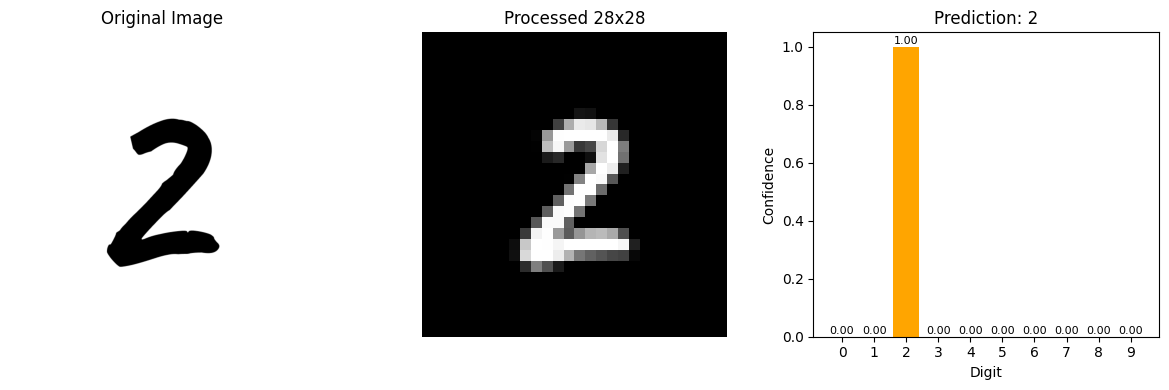

1/1 [==============================] - 0s 139ms/step


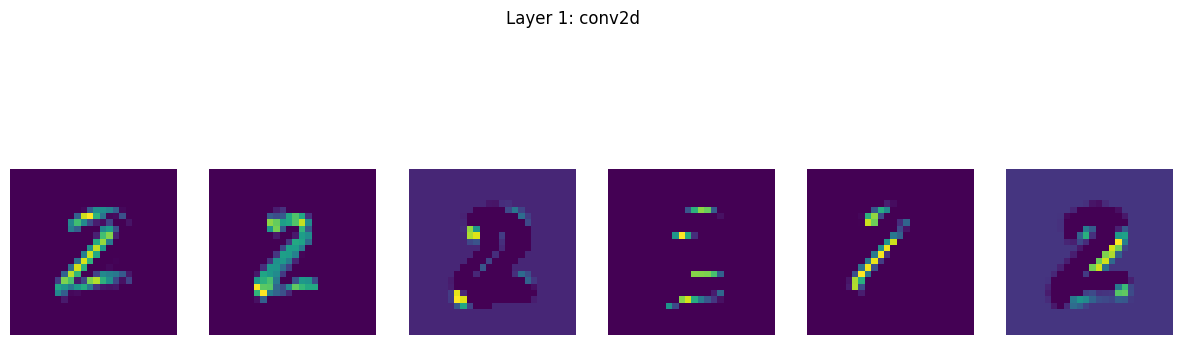

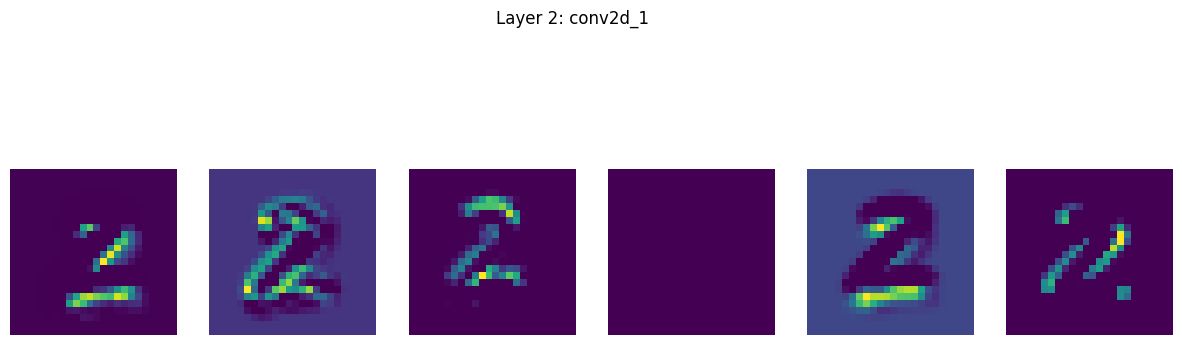

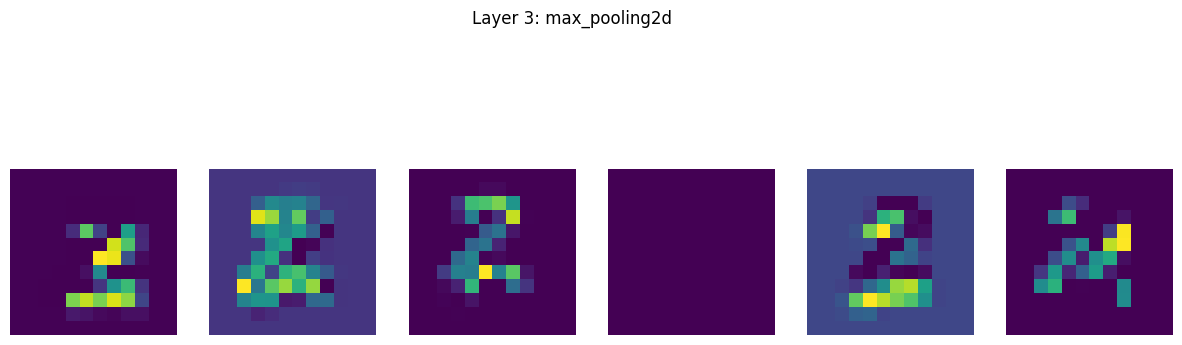

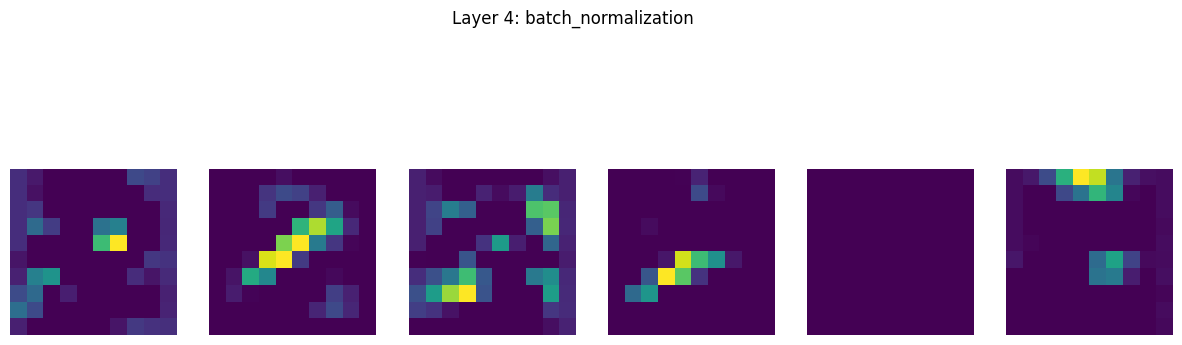

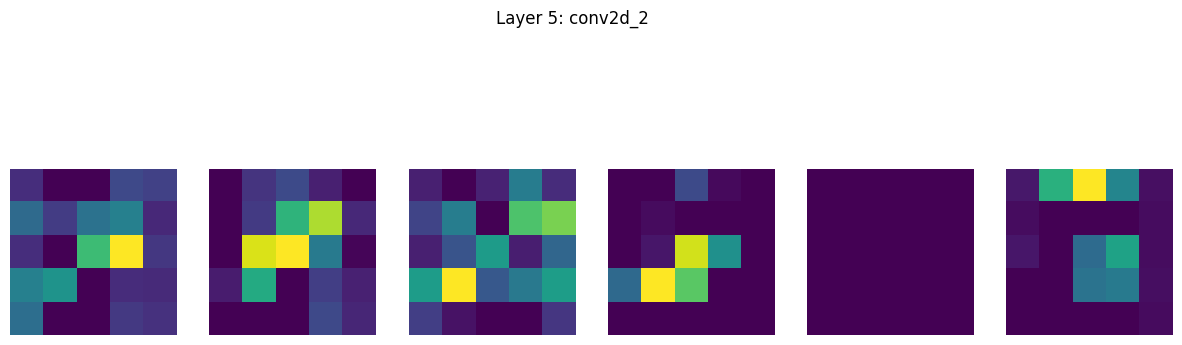

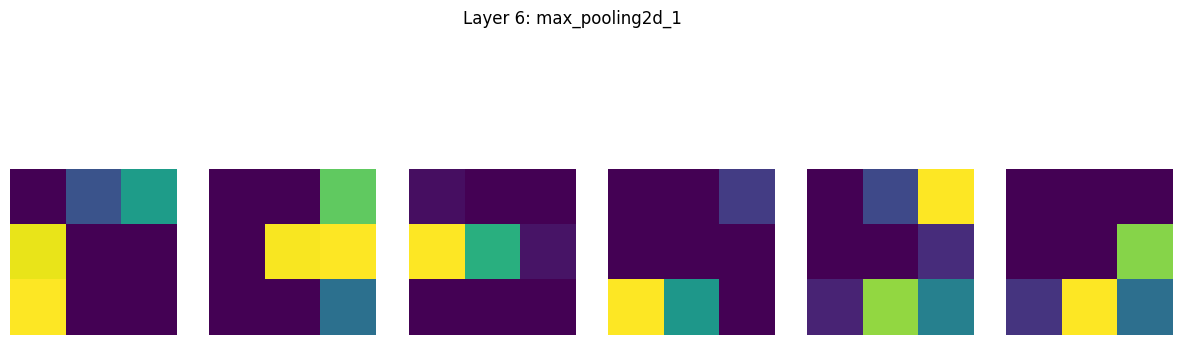

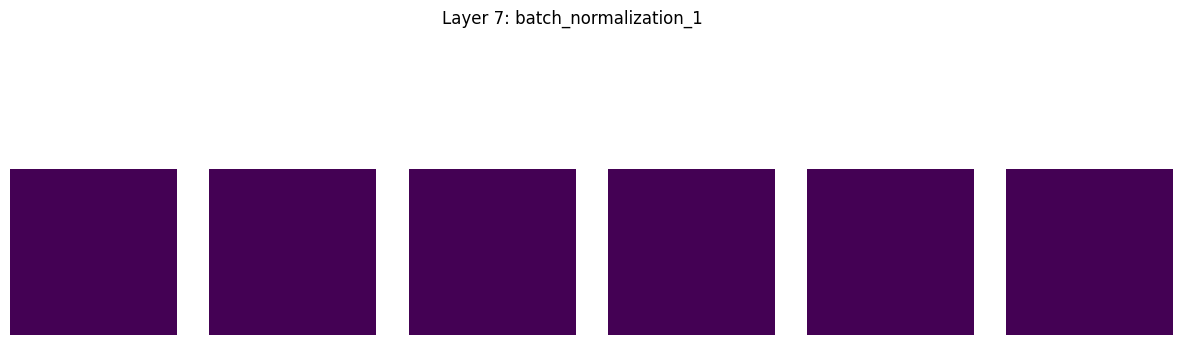

Predicted Digit: 2


In [4]:
# Provide the path to your image
image_path = "C:/Users/Asus/Downloads/sample.png"

# Predict and visualize
result = predict_digit_from_path(image_path)
print(f"Predicted Digit: {result}")
